# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime 
import time
from citipy import citipy
import pytemperature
# Import API key
api_key = 'c9afa63cfa3a7457c6008831a9be185c'

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?APPID=" + api_key + "&q="
datalst=[]
record_count = 0
#loop through list and create a sublist for each city
for city in cities:
    record_count += 1
    print(f"Processing Record {record_count} : {city}")
    path = url + city
    print(path)
    response = requests.get(path).json()
    if response['cod'] == 200:
        datalst.append([response['name'],
                        response['clouds']['all'],
                        response['main']['humidity'],
                        pytemperature.k2f(response['main']['temp']),
                        response['main']['pressure'],
                        response['wind']['speed'],
                        response['coord']['lat'],
                        response['coord']['lon']])
   
print("DONE")

Processing Record 1 : salo
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=salo
Processing Record 2 : ushuaia
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=ushuaia
Processing Record 3 : hailar
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=hailar
Processing Record 4 : terrace
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=terrace
Processing Record 5 : punta arenas
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=punta arenas
Processing Record 6 : ancud
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=ancud
Processing Record 7 : hilo
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=hilo
Processing Record 8 : mataura
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=mataura


Processing Record 65 : illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=illoqqortoormiut
Processing Record 66 : cedral
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=cedral
Processing Record 67 : bilibino
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=bilibino
Processing Record 68 : amalner
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=amalner
Processing Record 69 : kahului
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=kahului
Processing Record 70 : san cristobal
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=san cristobal
Processing Record 71 : barrow
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=barrow
Processing Record 72 : hermanus
http://api.openweathermap.org/data/2.5/weather?APPI

Processing Record 130 : kidal
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=kidal
Processing Record 131 : clyde river
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=clyde river
Processing Record 132 : sao joao da barra
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=sao joao da barra
Processing Record 133 : los llanos de aridane
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=los llanos de aridane
Processing Record 134 : thinadhoo
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=thinadhoo
Processing Record 135 : dabakala
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=dabakala
Processing Record 136 : kavieng
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=kavieng
Processing Record 137 : butaritari
http://api.

Processing Record 195 : sibi
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=sibi
Processing Record 196 : katsuura
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=katsuura
Processing Record 197 : coro
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=coro
Processing Record 198 : tiksi
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=tiksi
Processing Record 199 : ilanskiy
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=ilanskiy
Processing Record 200 : half moon bay
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=half moon bay
Processing Record 201 : klaksvik
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=klaksvik
Processing Record 202 : kang
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c600

Processing Record 258 : kieta
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=kieta
Processing Record 259 : hualmay
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=hualmay
Processing Record 260 : bontang
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=bontang
Processing Record 261 : baijiantan
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=baijiantan
Processing Record 262 : talara
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=talara
Processing Record 263 : sao filipe
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=sao filipe
Processing Record 264 : longyearbyen
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=longyearbyen
Processing Record 265 : santa maria
http://api.openweathermap.org/data/2.5/weather?APPID

Processing Record 323 : omboue
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=omboue
Processing Record 324 : grand river south east
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=grand river south east
Processing Record 325 : vanimo
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=vanimo
Processing Record 326 : jibuti
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=jibuti
Processing Record 327 : kant
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=kant
Processing Record 328 : hvammstangi
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=hvammstangi
Processing Record 329 : te anau
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=te anau
Processing Record 330 : canandaigua
http://api.openweathermap.org/data/2.5/wea

Processing Record 386 : sharya
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=sharya
Processing Record 387 : talnakh
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=talnakh
Processing Record 388 : payo
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=payo
Processing Record 389 : iberia
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=iberia
Processing Record 390 : vostok
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=vostok
Processing Record 391 : meulaboh
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=meulaboh
Processing Record 392 : dunedin
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=dunedin
Processing Record 393 : areia branca
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831

Processing Record 451 : keningau
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=keningau
Processing Record 452 : mangrol
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=mangrol
Processing Record 453 : bonthe
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=bonthe
Processing Record 454 : umm durman
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=umm durman
Processing Record 455 : preston
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=preston
Processing Record 456 : babanusah
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=babanusah
Processing Record 457 : abu samrah
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=abu samrah
Processing Record 458 : kloulklubed
http://api.openweathermap.org/data/2.5/weather?APPID

Processing Record 515 : avera
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=avera
Processing Record 516 : atar
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=atar
Processing Record 517 : narsaq
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=narsaq
Processing Record 518 : huilong
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=huilong
Processing Record 519 : cagayan de tawi-tawi
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=cagayan de tawi-tawi
Processing Record 520 : yarmouth
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=yarmouth
Processing Record 521 : rypefjord
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=rypefjord
Processing Record 522 : poum
http://api.openweathermap.org/data/2.5/weather?APPID=c9

Processing Record 579 : pandan
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=pandan
Processing Record 580 : harper
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=harper
Processing Record 581 : lucea
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=lucea
Processing Record 582 : along
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=along
Processing Record 583 : mae ramat
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=mae ramat
Processing Record 584 : alyangula
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=alyangula
Processing Record 585 : eyl
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q=eyl
Processing Record 586 : ayan
http://api.openweathermap.org/data/2.5/weather?APPID=c9afa63cfa3a7457c6008831a9be185c&q

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Pull list into dataframe
df = pd.DataFrame(datalst,columns = ['city','clouds','humidity','tempf','pressure','wind speed','latitude','longitude']) 
df.head()

,city,clouds,humidity,tempf,pressure,wind speed,latitude,longitude
0,Salo,12,93,40.98,994.00,3.10,60.38,23.13
1,Ushuaia,75,86,33.78,998.00,4.10,-54.81,-68.31
2,Hailar,0,63,42.38,949.53,5.12,49.20,119.70
3,Terrace,75,20,51.78,1017.00,5.10,54.52,-128.61
4,Punta Arenas,75,86,39.18,1001.00,9.30,-53.16,-70.91


In [5]:
df.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

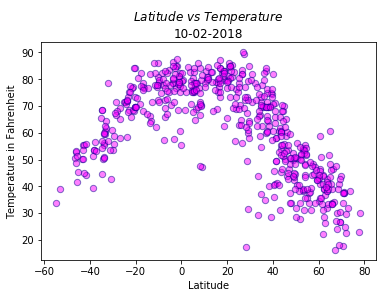

In [6]:
# Build the scatter plots for each city types
plt.scatter(df.latitude, df.tempf, 40,marker="o", alpha = .5,facecolors="magenta", edgecolors="darkblue")
# Incorporate the other graph properties
plt.title(r'$\mathit{Latitude \ vs \ Temperature}$' + "\n" + datetime.datetime.now().strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Temperature in Fahrenheit")
plt.savefig("Images/latvstemp.png")

#### Latitude vs. Humidity Plot

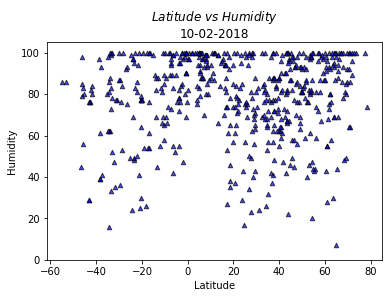

In [7]:
# Build the scatter plots for each city types
plt.scatter(df.latitude, df.humidity,20, marker="^", alpha = .7,facecolors="blue", edgecolors="black")
# Incorporate the other graph properties
plt.title(r'$\mathit{Latitude \ vs \ Humidity}$' + "\n" + datetime.datetime.now().strftime("%m-%d-%Y"))
plt.ylim(0,105)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("Images/latvshumid.png")

#### Latitude vs. Cloudiness Plot

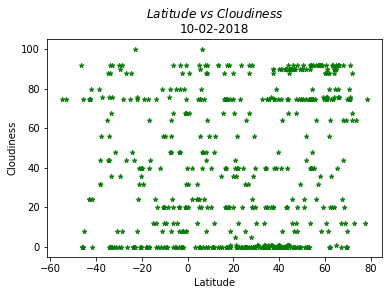

In [8]:
# Build the scatter plots for each city types
plt.scatter(df.latitude, df.clouds, 20,marker=r'$\bigstar$', alpha = .9,facecolors="green")
# Incorporate the other graph properties
plt.title(r'$\mathit{Latitude \ vs \ Cloudiness}$' + "\n" + datetime.datetime.now().strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("Images/latvsclouds.png")

#### Latitude vs. Wind Speed Plot

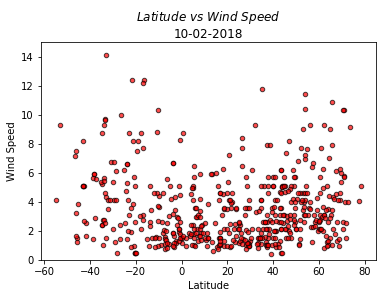

In [11]:
# Build the scatter plots for each city types
plt.scatter(df.latitude, df['wind speed'],20, marker="o", alpha = .7,facecolors="red", edgecolors="black")
# Incorporate the other graph properties
plt.title(r'$\mathit{Latitude \ vs \ Wind \ Speed}$' + "\n" + datetime.datetime.now().strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylim(0,15)
plt.ylabel("Wind Speed")
plt.savefig("Images/latvswind.png")

<div class="alert alert-block alert-info">
<b><font size="6">Findings</font></b> 
</div>

### Latitude vs Temperature
* Higher temperatures definitly correlate with closeness to the equator (0 Latitude) today.
***
### Latitude vs Humidity
* There seems to be a slight correlation between higher humidity at both 0 and higher latitudes. 
***
### Latitude vs Cloudiness
* Around between 20 and 60 Latitude it looks like its clearer than everywhere else. 
***
### Latitude vs Wind Speed
* There is no place with no wind right now. Lower latitudes appear to have faster winds.